In [2]:
# Import of the basic libraries
import pandas as pd # for data manipulation
import numpy as np # for computational anaylsis
import matplotlib.pyplot as plt # for visualization
import seaborn as sns 
from pandas.plotting import scatter_matrix

#### Load the data in a data frame and print the first rows.

In [3]:
def load_dataset():
    data = pd.read_csv('https://storage.googleapis.com/qwasar-public/track-ds/boston.csv')
    return data
boston_dataframe = load_dataset()

In [4]:
def print_summarize_dataset(dataset):
    print(f"Dataset dimension:\n{dataset.shape}\n\nFirst 10 rows of dataset:\n{dataset.head(10)}\n\nStatistical summary:\n{dataset.describe()}")

print_summarize_dataset(load_dataset())

Dataset dimension:
(506, 14)

First 10 rows of dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MDEV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  

## Cleaning and Pre-processing

#### Make a function that cleans the dataset from lines which any missing values.

In [5]:
def clean_dataset(boston_dataframe):
    # Drop rows with any missing values
    cleaned_dataframe = boston_dataframe.dropna()

    return cleaned_dataframe

## Data Analysis

#### Printing all histograms.

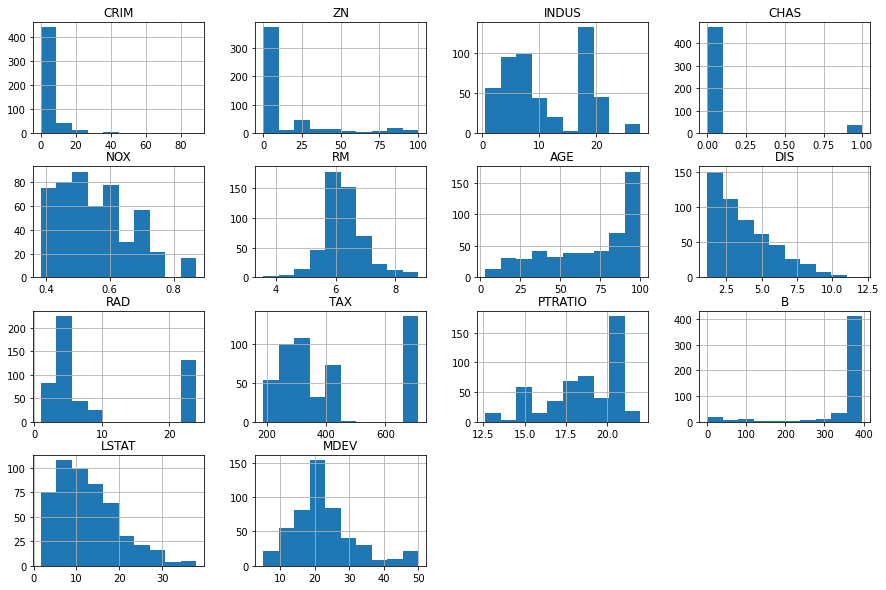

In [6]:
def print_histograms(boston_dataframe):
    boston_dataframe.hist(figsize=(15, 10))
print_histograms(boston_dataframe)

In [7]:
def compute_correlations_matrix(boston_dataframe):
    # Compute the Pearson's correlation matrix
    correlations_matrix = boston_dataframe.corr(method='pearson')
    
    # compute the shape of the correlation
    shape = correlations_matrix.shape
    print(shape)

    # Convert the correlation matrix to a dictionary
    correlations_dict = correlations_matrix.to_dict()

    return correlations_matrix


# Assuming you already have a DataFrame named 'boston_dataframe'
correlations = compute_correlations_matrix(boston_dataframe)
print(correlations['MDEV'])


(14, 14)
CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MDEV       1.000000
Name: MDEV, dtype: float64


In [8]:
def print_scatter_matrix(boston_dataframe):
    # Create the scatter matrix plot using Seaborn
    sns.set(style='ticks')
    sns.pairplot(boston_dataframe)
    plt.show()

# Example usage:
# Plot scatter matrix
#print_scatter_matrix(boston_dataframe)

In [9]:
# Linear Regression function
from sklearn.linear_model import LinearRegression

def boston_fit_model(boston_dataframe):
    # Select two columns from the dataset: RM and MDEV
    model_dataset = boston_dataframe[["RM", "MDEV"]]
    regressor = LinearRegression()
    
    # Extract column 1 (RM) as input (X)
    x = model_dataset.iloc[:, :-1].values
    # Extract column 2 (MDEV) as output (y)
    y = model_dataset.iloc[:, 1].values
    
    # Train the model
    regressor.fit(x, y)
    return regressor
print(boston_fit_model(boston_dataframe))

LinearRegression()


In [10]:
boston_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
boston_dataframe.iloc[:, :-1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
boston_dataframe[["RM", "MDEV"]]

,RM,MDEV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [13]:
boston_dataframe[["RM", "MDEV"]].iloc[:, -1:]

,MDEV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [14]:
def boston_predict(estimator, array_to_predict):
    df = estimator.predict(array_to_predict)
    return df

data = boston_dataframe[["RM", "MDEV"]].iloc[:, :-1]
estimator = boston_fit_model(boston_dataframe.iloc[:, 1:])
print(boston_predict(estimator, data))

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155 23.3735282  20.02395209
 18.93169901 19.47782555 20.81583557 18.43108302 19.35039603 19.85101202
 14.99048582 17.45715736 16.02812625 19.6234593  21.23453259 18.23993873
 19.25027283 16.29208741 18.23993873 20.36983223 24.44757706 26.07685456
 17.32972783 20.59738496 19.48692766 17.22050253 20.81583557 19.33219181
 18.49479778 18.57671676 19.63256141 25.35778795 29.26259271 26.95065703
 21.48028953 21.86257811 20.57007863 17.04756245 17.99418179 20.21509638
 14.47166561 16.31939374 19.60525508 20.98877564 24.5932108  19.92382889
 18.9225969  31.31056723 23.42814085 27.36935404 21.26183891 19.27757916
 17.58458688 19.63256141 24.09259481 26.87784015 29.99076143 22.58164472
 18.0032839  18.83157581 16.24657686 18.89529058 23.73761256 19.58705086
 20.53367019 22.17204981 22.42690886 22.54523628 22.48152152 21.21632837
 22.05372239 18.79516738 26.55926634 25.57623857 22

In [15]:
def print_model_prediction_evaluator(base_test, prediction):
    print('Mean Absolute Error:', metrics.mean_absolute_error(base_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(base_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(base_test, prediction)))

In [16]:
!gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v4.1.12-deab022 (production)
Loading parameters:  OK
User aniyom_e connection: OK


<MY_TU_VERRAS>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT         MY TU VERRAS  

 Status             SUCCESS        
 Execution Runtime  4.993569       
 Score              [=======-] 7/8 


Checks detail Report:

 TEST BOSTON FIT MODEL  SUCCESS 



 TEST BOSTON PREDICT  SUCCESS 



 TEST CLEAN DATASET  SUCCESS 



 TEST COMPUTE CORRELATIONS MATRIX  SUCCESS 



 TEST LOAD DATASET  SUCCESS 



 TEST PRINT HISTOGRAMS  SUCC